In [1]:
import pandas as pd

df = pd.read_csv("C:/Users/jihun/OneDrive/바탕 화면/데이터 프로그램/vscode/작업장/df_trim.csv")

In [2]:
df = df.iloc[:, :-7]
print(df.head())

   sorted_2016  affective_polarization_2020  participation  \
0            0                           70              2   
1            0                           40              4   
2            0                           20              3   
3            1                           85              3   
4            0                           55              3   

   pol_interest_index pol_interest_cat  social_political_days  \
0            0.523810              med               1.000000   
1            0.404762              low               0.000000   
2            0.380952              low               0.000000   
3            0.464286              med               0.142857   
4            0.761905             high               0.714286   

   scaled_channel_count            age_group age_group_13 age_group_4  ...  \
0                   0.2  03. Age group 25-29        25-29       18-29  ...   
1                   0.6  09. Age group 55-59        55-59       45-59  ...   
2 

In [ ]:
from dowhy import gcm
import networkx as nx
import pandas as pd
import numpy as np
from dowhy.gcm import InvertibleStructuralCausalModel, EmpiricalDistribution, AdditiveNoiseModel
from dowhy.gcm.ml import create_linear_regressor

edges = [
    ('pol_interest_index', 'sorted_2016'),
    ('pol_interest_index', 'affective_polarization_2020'),
    ('pol_interest_index', 'participation'),
    ('pol_interest_index', 'social_political_days'),
    ('pol_interest_index', 'scaled_channel_count'),
    ('participation', 'sorted_2016'),
    ('participation', 'affective_polarization_2020'),
    ('social_political_days', 'sorted_2016'),
    ('social_political_days', 'affective_polarization_2020'),
    ('scaled_channel_count', 'sorted_2016'),
    ('scaled_channel_count', 'affective_polarization_2020'),
    ('age_group_4', 'sorted_2016'),
    ('age_group_4', 'affective_polarization_2020'),
    ('age_group_4', 'pol_interest_index'),
    ('race_collapsed', 'sorted_2016'),
    ('race_collapsed', 'affective_polarization_2020'),
    ('region', 'sorted_2016'),
    ('region', 'affective_polarization_2020'),
    ('region', 'social_political_days'),
    ('region', 'scaled_channel_count'),
    ('sorted_2016', 'affective_polarization_2020'),
    ('pol_interest_index', 'affective_polarization_2016'),
    ('participation', 'affective_polarization_2016'),
    ('social_political_days', 'affective_polarization_2016'),
    ('scaled_channel_count', 'affective_polarization_2016'),
    ('age_group_4', 'affective_polarization_2016'),
    ('race_collapsed', 'affective_polarization_2016'),
    ('region', 'affective_polarization_2016'),
    ('affective_polarization_2016', 'sorted_2016'),
    ('affective_polarization_2016', 'affective_polarization_2020')
]
graph_nx = nx.DiGraph(edges)

In [ ]:
#DAG

edges = [
    ('pol_interest_index', 'sorted_2016'),
    ('pol_interest_index', 'affective_polarization_2020'),
    ('pol_interest_index', 'participation'),
    ('pol_interest_index', 'social_political_days'),
    ('pol_interest_index', 'scaled_channel_count'),
    ('participation', 'sorted_2016'),
    ('participation', 'affective_polarization_2020'),
    ('social_political_days', 'sorted_2016'),
    ('social_political_days', 'affective_polarization_2020'),
    ('scaled_channel_count', 'sorted_2016'),
    ('scaled_channel_count', 'affective_polarization_2020'),
    ('age_group_4', 'sorted_2016'),
    ('age_group_4', 'affective_polarization_2020'),
    ('age_group_4', 'pol_interest_index'),
    ('race_collapsed', 'sorted_2016'),
    ('race_collapsed', 'affective_polarization_2020'),
    ('region', 'sorted_2016'),
    ('region', 'affective_polarization_2020'),
    ('region', 'social_political_days'),
    ('region', 'scaled_channel_count'),
    ('sorted_2016', 'affective_polarization_2020'),
    ('pol_interest_index', 'affective_polarization_2016'),
    ('participation', 'affective_polarization_2016'),
    ('social_political_days', 'affective_polarization_2016'),
    ('scaled_channel_count', 'affective_polarization_2016'),
    ('age_group_4', 'affective_polarization_2016'),
    ('race_collapsed', 'affective_polarization_2016'),
    ('region', 'affective_polarization_2016'),
    ('affective_polarization_2016', 'sorted_2016'),
    ('affective_polarization_2016', 'affective_polarization_2020'),
    ('education', 'pol_interest_index'),
    ('age_group_4', 'education'),
    ('race_collapsed', 'education'),
    ('region', 'education'),
    ('social_political_days', 'participation'),
    ('scaled_channel_count', 'participation')
]
graph_nx_1 = nx.DiGraph(edges)

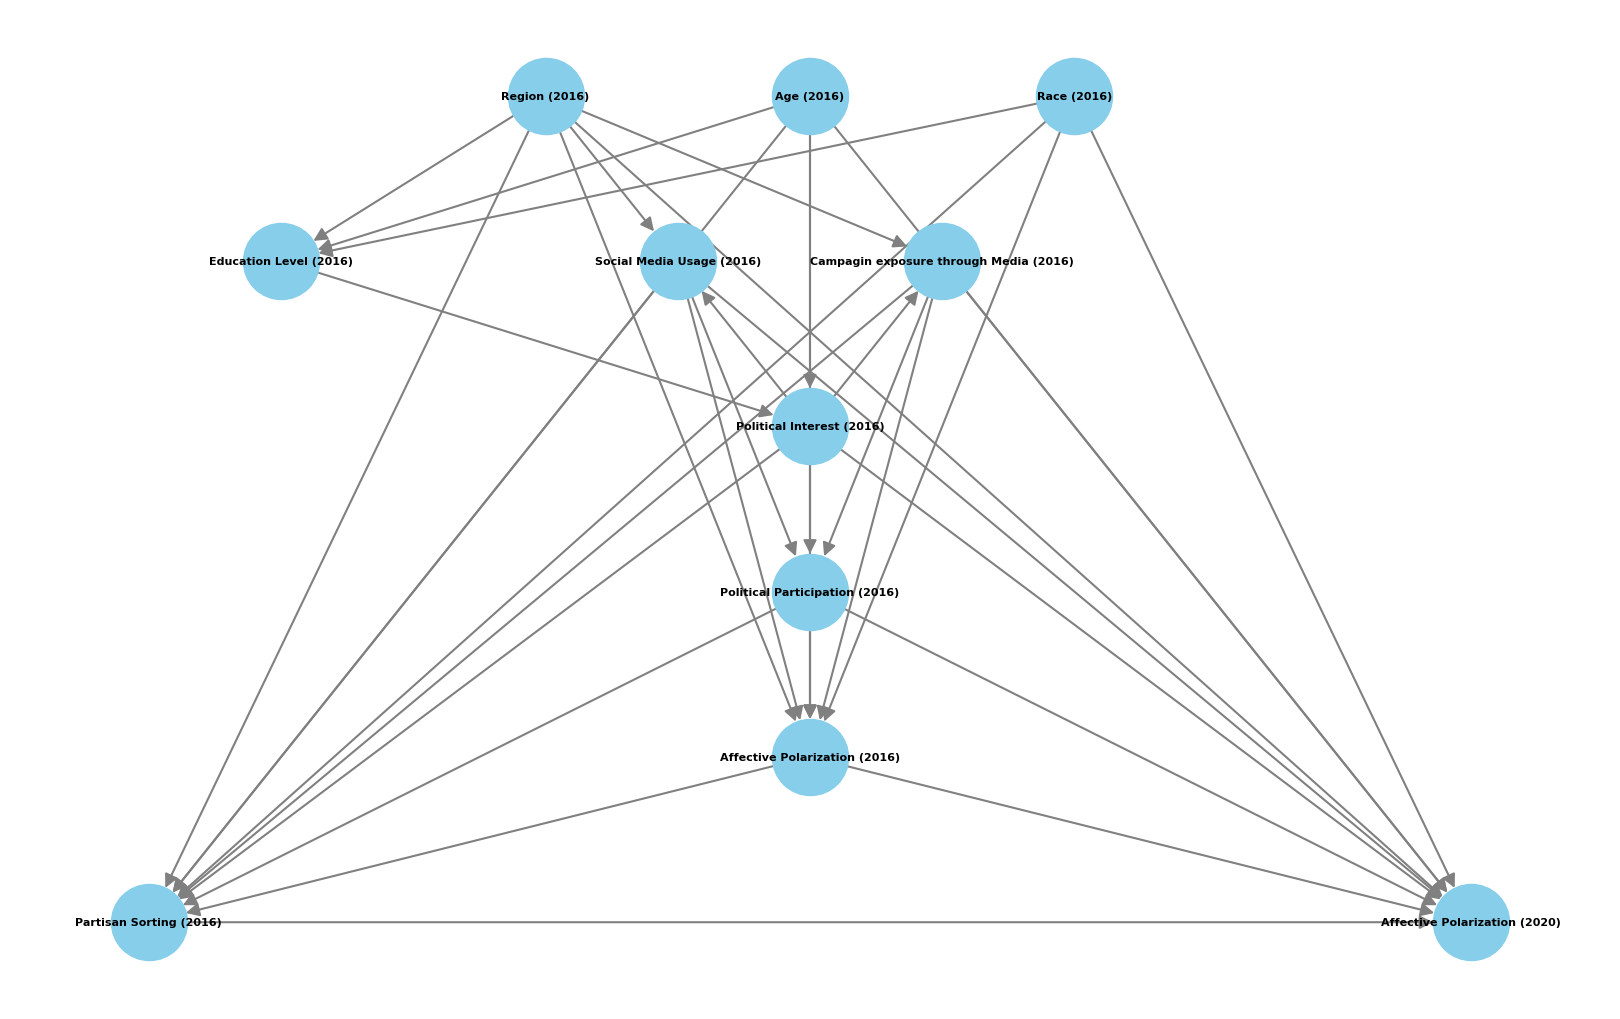

In [ ]:

pos = {
    'sorted_2016': (-5, 0),
    'affective_polarization_2020': (5, 0), 
    'affective_polarization_2016': (0, 1), 
    'participation': (0, 2),
    'pol_interest_index': (0, 3),
    'social_political_days': (-1, 4),
    'scaled_channel_count': (1, 4),
    'age_group_4': (0, 5),
    'race_collapsed': (2, 5),
    'region': (-2, 5),
    'education': (-4, 4)
}


node_labels = {
    'sorted_2016': 'Partisan Sorting (2016)',
    'affective_polarization_2020': 'Affective Polarization (2020)',
    'affective_polarization_2016': 'Affective Polarization (2016)',
    'participation': 'Political Participation (2016)',
    'pol_interest_index': 'Political Interest (2016)',
    'social_political_days': 'Social Media Usage (2016)',
    'scaled_channel_count': 'Campagin exposure through Media (2016)',
    'age_group_4': 'Age (2016)',
    'race_collapsed': 'Race (2016)',
    'region': 'Region (2016)',
    'education': 'Education Level (2016)'
}

for node in graph_nx_1.nodes():
    if node not in node_labels:
        node_labels[node] = node 
    if node not in pos:
        
        pass

plt.figure(figsize=(16, 10)) 
nx.draw(graph_nx_1, 
        pos, 
        labels=node_labels,
        with_labels=True, 
        node_size=3000, 
        node_color="skyblue", 
        font_size=8, 
        font_weight="bold", 
        arrowsize=20,
        width=1.5, 
        edge_color="gray" 
       )



In [ ]:
from dowhy import CausalModel
import pandas as pd


model = CausalModel(
    data=df,
    treatment="sorted_2016",
    outcome="affective_polarization_2020",
    graph=graph_nx, 
    instrument_names=[],
    mediator_names=[]
)

estimand = model.identify_effect()
print(estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                        ↪
─────────────(E[affective_polarization_2020|participation,age_group_4,social_p ↪
d[sorted₂₀₁₆]                                                                  ↪

↪                                                                              ↪
↪ olitical_days,pol_interest_index,region,scaled_channel_count,affective_polar ↪
↪                                                                              ↪

↪                              
↪ ization_2016,race_collapsed])
↪                              
Estimand assumption 1, Unconfoundedness: If U→{sorted_2016} and U→affective_polarization_2020 then P(affective_polarization_2020|sorted_2016,participation,age_group_4,social_political_days,pol_interest_index,region,scaled_channel_count,affective_polarization_2016,race_collapsed,U) = P(affective_polarizatio

In [ ]:
from dowhy import CausalModel
from dowhy.gcm.auto import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.linear_model import LassoCV



model = CausalModel(
    data=df,
    treatment="sorted_2016",
    outcome="affective_polarization_2020",
    graph=graph_nx
)


estimand = model.identify_effect()


estimate = model.estimate_effect(
    identified_estimand = estimand,
    method_name         = 'backdoor.econml.dml.DML',
    method_params       = {
        'init_params': {
            'model_y':       GradientBoostingRegressor(random_state=0),
            'model_t':       LogisticRegression(solver="lbfgs", max_iter=1000,random_state=1),
            'model_final':   LassoCV(cv=5, random_state=2, fit_intercept=False),
            'discrete_treatment': True,
            'cv':           5,
            'random_state': 42
        },
        'fit_params': {}
    }
)


print(f'Estimate of causal effect (DML): {estimate.value:.3f}')

Estimate of causal effect (DML): 2.772


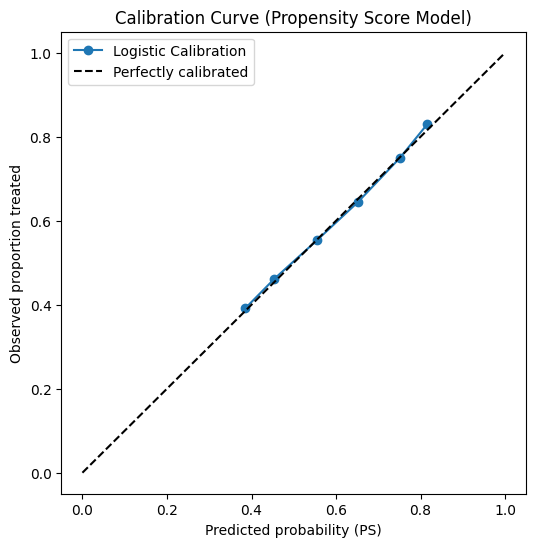

In [ ]:
confounders = [
    'pol_interest_index',
    'participation',
    'social_political_days',
    'scaled_channel_count',
    'age_group_4',
    'race_collapsed',
    'region',
    'affective_polarization_2016',
]
df["random_outcome"] = np.random.normal(size=len(df))

import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve


from sklearn.linear_model import LogisticRegression

X_raw = df[confounders]
X = pd.get_dummies(X_raw, drop_first=True)
y = df["sorted_2016"]
ps_model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=1)
ps_model.fit(X, y)
ps_pred = ps_model.predict_proba(X)[:, 1]
df["ps"] = ps_pred


prob_true, prob_pred = calibration_curve(y, ps_pred, n_bins=10)

plt.figure(figsize=(6, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Logistic Calibration')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Predicted probability (PS)')
plt.ylabel('Observed proportion treated')
plt.title('Calibration Curve (Propensity Score Model)')
plt.legend()
plt.show()

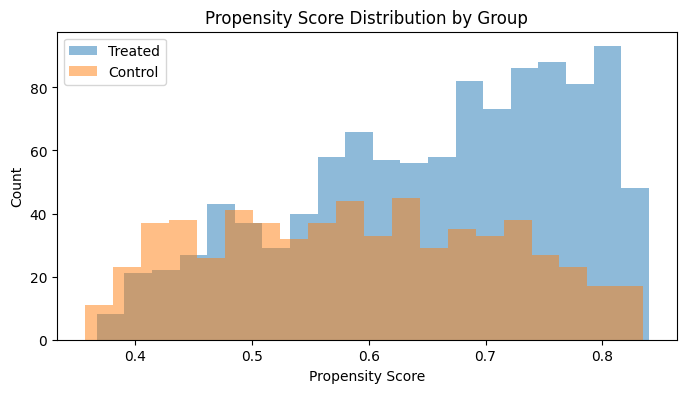

In [79]:
plt.figure(figsize=(8,4))
plt.hist(df[df["sorted_2016"]==1]["ps"], bins=20, alpha=0.5, label='Treated')
plt.hist(df[df["sorted_2016"]==0]["ps"], bins=20, alpha=0.5, label='Control')
plt.xlabel("Propensity Score")
plt.ylabel("Count")
plt.title("Propensity Score Distribution by Group")
plt.legend()
plt.show()


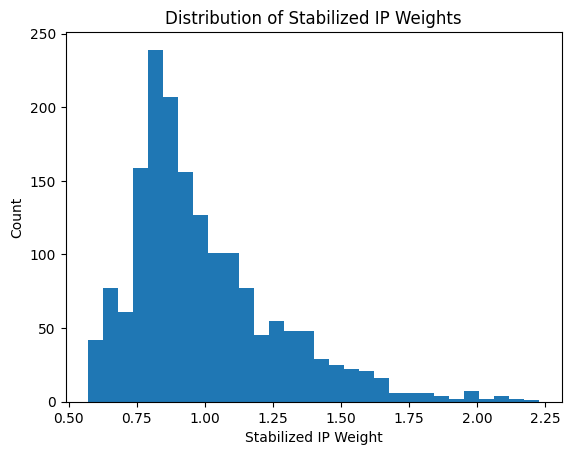

                       Variable       SMD
0            pol_interest_index  0.021324
6             age_group_4_45-59 -0.017884
5             age_group_4_30-44  0.016115
10         race_collapsed_White  0.014369
13                  region_West  0.013967
12                 region_South -0.011677
4   affective_polarization_2016 -0.007907
8       race_collapsed_Hispanic  0.007487
11             region_Northeast -0.005420
2         social_political_days  0.005023
3          scaled_channel_count  0.004935
7               age_group_4_60+  0.002761
1                 participation  0.002629
9          race_collapsed_Other  0.002572


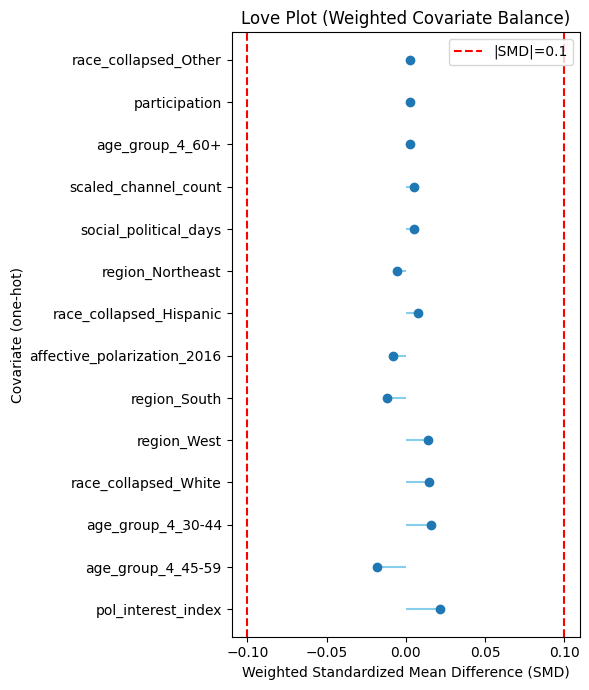

In [ ]:
p_treated = y.mean()
p_control = 1 - p_treated
df['w_stab'] = np.where(
    df["sorted_2016"] == 1, p_treated / df["ps"], p_control / (1 - df["ps"])
)


plt.hist(df['w_stab'], bins=30)
plt.xlabel('Stabilized IP Weight')
plt.ylabel('Count')
plt.title('Distribution of Stabilized IP Weights')
plt.show()


def weighted_mean(x, w):
    return np.sum(x * w) / np.sum(w)

def weighted_var(x, w):
    mu = weighted_mean(x, w)
    return np.sum(w * (x - mu)**2) / np.sum(w)

def compute_weighted_smd(x1, w1, x0, w0):
    m1, m0 = weighted_mean(x1, w1), weighted_mean(x0, w0)
    s1, s0 = np.sqrt(weighted_var(x1, w1)), np.sqrt(weighted_var(x0, w0))
    s_pooled = np.sqrt((s1**2 + s0**2)/2)
    return (m1 - m0) / s_pooled

treat_idx = df["sorted_2016"] == 1
control_idx = df["sorted_2016"] == 0
smd_dict = {}


for c in X.columns:
    smd = compute_weighted_smd(
        X.loc[treat_idx, c], df.loc[treat_idx, 'w_stab'],
        X.loc[control_idx, c], df.loc[control_idx, 'w_stab']
    )
    smd_dict[c] = smd

smd_df = pd.DataFrame(list(smd_dict.items()), columns=["Variable", "SMD"]).sort_values(by="SMD", key=np.abs, ascending=False)
print(smd_df)

# 5. Love plot
plt.figure(figsize=(6, min(12, len(smd_df)/2)))
plt.hlines(y=smd_df["Variable"], xmin=0, xmax=smd_df["SMD"], color='skyblue')
plt.plot(smd_df["SMD"], smd_df["Variable"], "o")
plt.axvline(0.1, color='red', linestyle='--', label='|SMD|=0.1')
plt.axvline(-0.1, color='red', linestyle='--')
plt.xlabel('Weighted Standardized Mean Difference (SMD)')
plt.ylabel('Covariate (one-hot)')
plt.title('Love Plot (Weighted Covariate Balance)')
plt.legend()
plt.tight_layout()
plt.show()



In [81]:
estimate_lr = model.estimate_effect(
    identified_estimand=estimand,
    method_name='backdoor.linear_regression')

print(f'Estimate of causal effect (linear regression): {estimate_lr.value}')

Estimate of causal effect (linear regression): 2.9670707331094093


Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression

estimate_aipw = model.estimate_effect(
    identified_estimand=estimand,
    method_name='backdoor.econml.dr.LinearDRLearner',
    method_params={
        'init_params': {
            'model_regression': LinearRegression(), 
            'model_propensity': LogisticRegression(solver='liblinear', random_state=0),
            'cv': 5 
        },
        'fit_params': {}
    }
)

print(f'Estimate of causal effect (AIPW/DRLearner): {estimate_aipw.value}')

Estimate of causal effect (AIPW/DRLearner): 2.5718147305388763


In [83]:
estimate_psm = model.estimate_effect(
    identified_estimand=estimand,
    method_name='backdoor.propensity_score_matching')

print(f'Estimate of causal effect (PSM): {estimate_psm.value}')

Estimate of causal effect (PSM): 1.9923349056603774


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [84]:
estimate_psw = model.estimate_effect(
    identified_estimand=estimand,
    method_name='backdoor.propensity_score_weighting',
    control_value=0,
    treatment_value=1
)

print(f'Estimate of causal effect (PSW): {estimate_psw.value}')

Estimate of causal effect (PSW): 2.703454184339755


In [85]:
estimate_psw = model.estimate_effect(
    identified_estimand=estimand,
    method_name='backdoor.propensity_score_stratification',
   control_value=0,
   treatment_value=1
)
print(f'Estimate of causal effect (PSS): {estimate_psw.value}')

Estimate of causal effect (PSS): 1.9704646104310228


In [86]:
random_cause = model.refute_estimate(
    estimand=estimand, 
    estimate=estimate,
    method_name='random_common_cause',    
    method_params={'num_simulations': 50, 'n_jobs': -1, 'random_state': 42}
)

print (random_cause)

Refute: Add a random common cause
Estimated effect:2.7702779253358614
New effect:2.8193264734498884
p value:0.78



In [87]:
placebo_refuter = model.refute_estimate(
    estimand=estimand, 
    estimate=estimate,
    method_name='placebo_treatment_refuter',
    method_params={'num_simulations': 50, 'n_jobs': -1, 'random_state': 42} 
)

print(placebo_refuter)

Refute: Use a Placebo Treatment
Estimated effect:2.7702779253358614
New effect:0.12454504039149236
p value:0.97



In [88]:
refute_results = model.refute_estimate(
    estimand=estimand,
    estimate=estimate,
    method_name="placebo_treatment_refuter",
    method_params={
        "placebo_type": "permute",
        'num_simulations': 50,
        'n_jobs': -1,
        'random_state': 42
    },
)
print(refute_results)

Refute: Use a Placebo Treatment
Estimated effect:2.7702779253358614
New effect:-0.04175073723167715
p value:0.9299999999999999



In [89]:
subset = model.refute_estimate(
    estimand=estimand,
    estimate=estimate,
    method_name="data_subset_refuter",
    method_params={"subset_fraction": 0.5, "num_simulations": 50, "n_jobs": -1, "random_state": 42},
)
print(subset)

Refute: Use a subset of data
Estimated effect:2.7702779253358614
New effect:2.5208160277259264
p value:0.8799999999999999



In [ ]:
from dowhy import CausalModel
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoCV
from tqdm import trange  
from dowhy.gcm.auto import LogisticRegression 
from joblib import Parallel, delayed
from dowhy import CausalModel
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoCV, LogisticRegression
import numpy as np
import pandas as pd

confounders = [
    'pol_interest_index',
    'participation',
    'social_political_days',
    'scaled_channel_count',
    'age_group_4',
    'race_collapsed',
    'region',
    'affective_polarization_2016',
]
df["random_outcome"] = np.random.normal(size=len(df))

def dml_bootstrap(seed):
    df_boot = df.sample(frac=1, replace=True, random_state=seed)
    boot_model = CausalModel(
        data           = df_boot,
        treatment      = "sorted_2016",
        outcome        = "random_outcome",
        common_causes  = confounders
    )
    boot_estimand = boot_model.identify_effect()
    boot_estimate = boot_model.estimate_effect(
        boot_estimand,
        method_name   = "backdoor.econml.dml.DML",
        method_params = {
            "init_params": {
                "model_y":       GradientBoostingRegressor(random_state=0),
                "model_t":       LogisticRegression(solver="lbfgs", max_iter=1000, random_state=1),
                "model_final":   LassoCV(cv=5, random_state=2, fit_intercept=False),
                "discrete_treatment": True,
                "cv":           3,
                "random_state":  3
            },
            "fit_params": {}
        }
    )
    return boot_estimate.value

n_boot = 500
n_jobs = -1  

bootstrap_estimates = Parallel(n_jobs=n_jobs, verbose=10)(
    delayed(dml_bootstrap)(seed) for seed in range(n_boot)
)

bs = np.array(bootstrap_estimates)
ci_lower, ci_upper = np.percentile(bs, [2.5, 97.5])

print(f"Bootstrap ATE mean : {bs.mean():.3f}")
print(f"95% CI             : ({ci_lower:.3f}, {ci_upper:.3f})")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 126 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 185 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 206 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 229 tasks      | elapsed:  

Bootstrap ATE mean : -0.033
95% CI             : (-0.143, 0.000)


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   57.4s finished


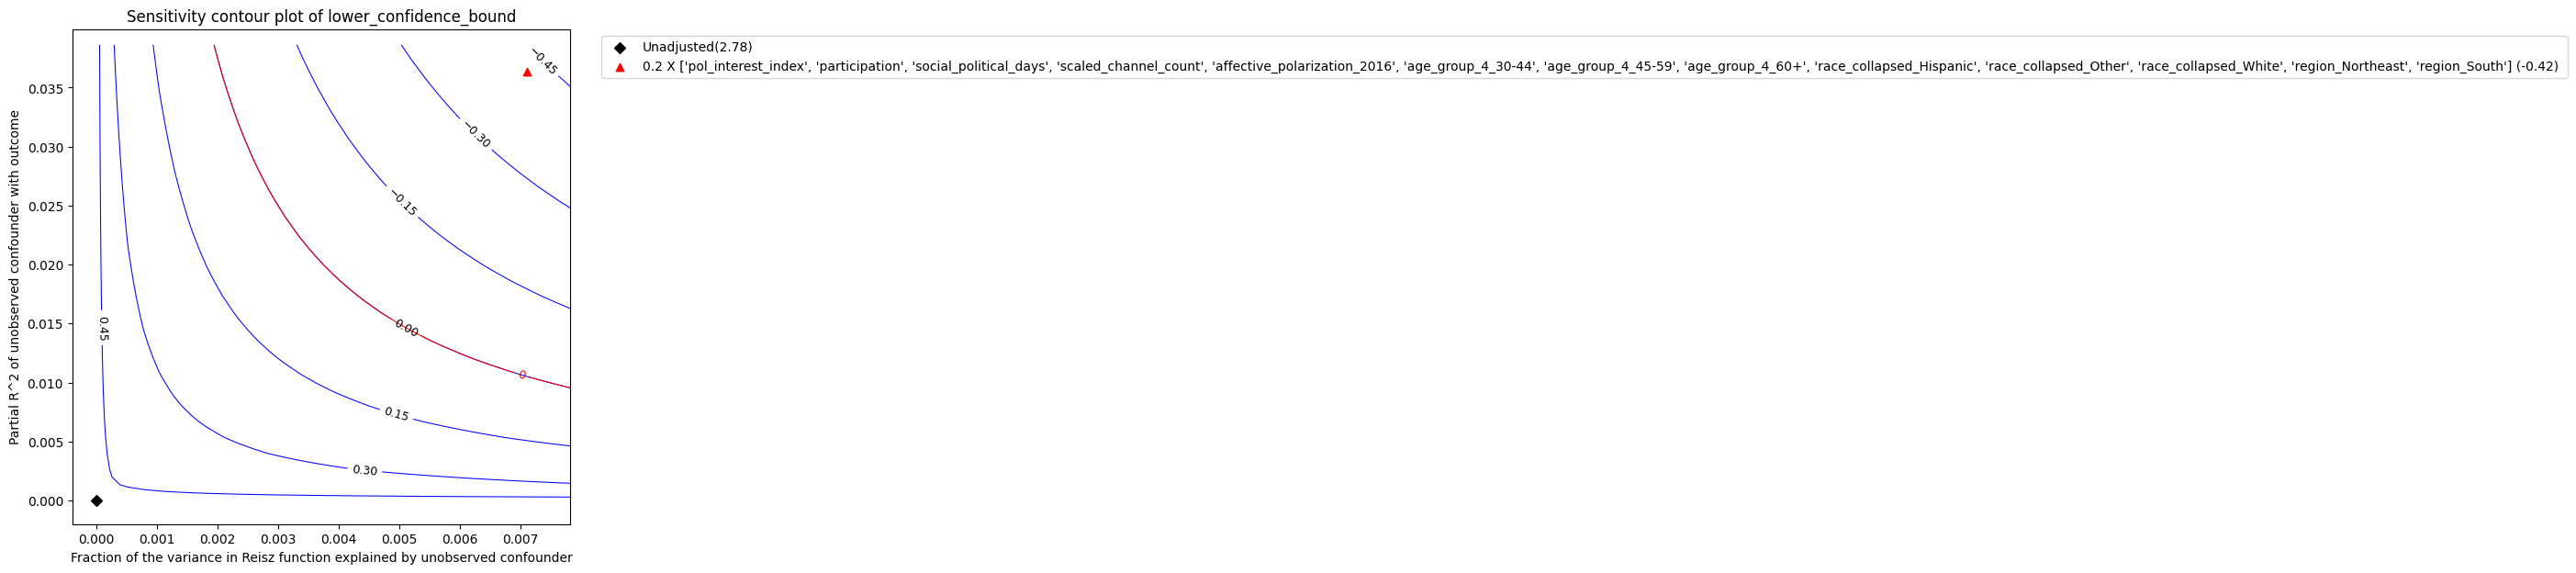

Sensitivity Analysis to Unobserved Confounding using partial R^2 parameterization

Original Effect Estimate : 2.783030340615291
Robustness Value : 0.05

Robustness Value (alpha=0.05) : 0.01

Interpretation of results :
Any confounder explaining less than 5.0% percent of the residual variance of both the treatment and the outcome would not be strong enough to explain away the observed effect i.e bring down the estimate to 0 

For a significance level of 5.0%, any confounder explaining more than 1.0% percent of the residual variance of both the treatment and the outcome would be strong enough to make the estimated effect not 'statistically significant'




In [ ]:
from dowhy import CausalModel
from dowhy.gcm.auto import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoCV


confounders = [
    'pol_interest_index',
    'participation',
    'social_political_days',
    'scaled_channel_count',
    'age_group_4',
    'race_collapsed',
    'region',
    'affective_polarization_2016',
]


numeric_benchmark_confounders = [
    'pol_interest_index',
    'participation',
    'social_political_days',
    'scaled_channel_count',
    'affective_polarization_2016',
    'age_group_4_30-44',
    'age_group_4_45-59',
    'age_group_4_60+',
    'race_collapsed_Hispanic',
    'race_collapsed_Other',
    'race_collapsed_White',
    'region_Northeast',
    'region_South'
]


model = CausalModel(
    data=df,
    treatment="sorted_2016",
    outcome="affective_polarization_2020",
    graph=graph_nx
)


estimand = model.identify_effect()


estimate = model.estimate_effect(
    identified_estimand = estimand,
    method_name         = 'backdoor.econml.dml.DML',
    method_params       = {
        'init_params': {
            'model_y':       GradientBoostingRegressor(random_state=0),
            'model_t':       LogisticRegression(solver="lbfgs", max_iter=1000, random_state=1),
            'model_final':   LassoCV(cv=5, random_state=2, fit_intercept=False),
            'discrete_treatment': True,
            'cv': 5,
            'random_state': 42
        },
        'fit_params': {}
    }
)
# Partial R2 + Reisz
refute = model.refute_estimate(
    estimand,
    estimate,
    method_name = "add_unobserved_common_cause",
    simulation_method = "non-parametric-partial-R2",
    benchmark_common_causes = numeric_benchmark_confounders, 
    effect_fraction_on_treatment = 0.2,
    effect_fraction_on_outcome = 0.2,
    plugin_reisz=True
)
print(refute)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 126 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 414 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 846 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1116 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1422 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  3.6min finished


총 부트스트랩 반복: 1500
정상 추정치 개수: 1314
NaN/에러 개수: 0
0으로 나온 케이스 개수: 186
Bootstrap mean estimate: 3.168
95% CI: (0.000, 5.646)


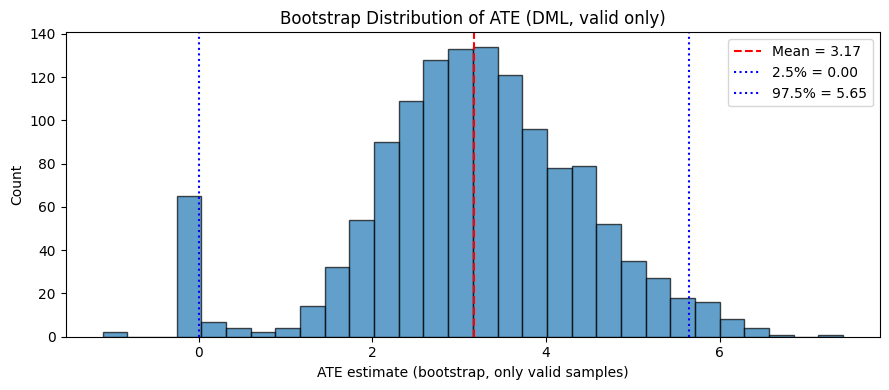

       treatment_count  control_count
count      1500.000000    1500.000000
mean       1073.026000     622.974000
std          19.753112      19.753112
min        1013.000000     554.000000
25%        1059.000000     610.000000
50%        1073.000000     623.000000
75%        1086.000000     637.000000
max        1142.000000     683.000000


In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from dowhy import CausalModel
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoCV
from joblib import Parallel, delayed
import matplotlib.pyplot as plt



n_bootstraps = 1500

def bootstrap_one(i):
    result = {
        'index': i,
        'estimate': np.nan,
        'is_zero': False,
        'treatment_count': 0,
        'control_count': 0,
        'error': None,
    }
    try:
        df_boot = df.sample(frac=1, replace=True, random_state=i)
        t_counts = Counter(df_boot['sorted_2016'])
        result['treatment_count'] = t_counts.get(1, 0)
        result['control_count'] = t_counts.get(0, 0)

        model = CausalModel(
            data=df_boot,
            treatment="sorted_2016",
            outcome="affective_polarization_2020",
            graph=graph_nx
        )
        estimand = model.identify_effect()
        estimate = model.estimate_effect(
            identified_estimand=estimand,
            method_name='backdoor.econml.dml.DML',
            method_params={
                'init_params': {
                    'model_y': GradientBoostingRegressor(random_state=i),
                    'model_t': LogisticRegression(solver="lbfgs", max_iter=1000, random_state=i),
                    'model_final': LassoCV(cv=5, random_state=i, fit_intercept=False),
                    'discrete_treatment': True,
                    'cv': 5,
                    'random_state': i
                },
                'fit_params': {}
            }
        )
        value = estimate.value
        if np.isfinite(value):
            result['estimate'] = value
            if value == 0:
                result['is_zero'] = True
        else:
            result['error'] = "Non-finite estimate"
    except Exception as e:
        result['error'] = str(e)
    return result


results = Parallel(n_jobs=-1, verbose=5)(
    delayed(bootstrap_one)(i) for i in range(n_bootstraps)
)


df_res = pd.DataFrame(results)
bootstrap_estimates = df_res['estimate'].values


good_idx = np.isfinite(bootstrap_estimates) & (bootstrap_estimates != 0)
bootstrap_good = bootstrap_estimates[good_idx]

print(f"총 부트스트랩 반복: {n_bootstraps}")
print(f"정상 추정치 개수: {len(bootstrap_good)}")
print(f"NaN/에러 개수: {df_res['error'].notnull().sum()}")
print(f"0으로 나온 케이스 개수: {df_res['is_zero'].sum()}")

if len(bootstrap_good) > 0:
    point_estimate = np.mean(bootstrap_good)
    ci_lower = np.percentile(bootstrap_good, 2.5)
    ci_upper = np.percentile(bootstrap_good, 97.5)

    print(f"Bootstrap mean estimate: {point_estimate:.3f}")
    print(f"95% CI: ({ci_lower:.3f}, {ci_upper:.3f})")
else:
    print("정상 추정치가 없습니다.")


plt.figure(figsize=(9, 4))
plt.hist(bootstrap_good, bins=30, alpha=0.7, edgecolor='k')
plt.axvline(point_estimate, color='red', linestyle='--', label=f"Mean = {point_estimate:.2f}")
plt.axvline(ci_lower, color='blue', linestyle=':', label=f"2.5% = {ci_lower:.2f}")
plt.axvline(ci_upper, color='blue', linestyle=':', label=f"97.5% = {ci_upper:.2f}")
plt.xlabel("ATE estimate (bootstrap, only valid samples)")
plt.ylabel("Count")
plt.title("Bootstrap Distribution of ATE (DML, valid only)")
plt.legend()
plt.tight_layout()
plt.show()


print(df_res[['treatment_count', 'control_count']].describe())

In [ ]:
zero_idxs = df_res[df_res['is_zero']].index
for i in zero_idxs[:5]:  
    ps_vals = df.sample(frac=1, replace=True, random_state=i)['ps'] 
    print(f"Bootstrap {i}: min_ps={ps_vals.min():.2f}, max_ps={ps_vals.max():.2f}, mean_ps={ps_vals.mean():.2f}")
    
for i in zero_idxs[:5]:
    out_vals = df.sample(frac=1, replace=True, random_state=i)['affective_polarization_2020']
    print(f"Bootstrap {i}: outcome min={out_vals.min():.2f}, max={out_vals.max():.2f}, mean={out_vals.mean():.2f}, std={out_vals.std():.2f}")

Bootstrap 10: min_ps=0.36, max_ps=0.84, mean_ps=0.63
Bootstrap 19: min_ps=0.36, max_ps=0.84, mean_ps=0.63
Bootstrap 22: min_ps=0.36, max_ps=0.84, mean_ps=0.64
Bootstrap 30: min_ps=0.36, max_ps=0.84, mean_ps=0.63
Bootstrap 45: min_ps=0.36, max_ps=0.84, mean_ps=0.63
Bootstrap 10: outcome min=0.00, max=100.00, mean=48.73, std=28.74
Bootstrap 19: outcome min=0.00, max=100.00, mean=49.81, std=28.95
Bootstrap 22: outcome min=0.00, max=100.00, mean=49.54, std=29.47
Bootstrap 30: outcome min=0.00, max=100.00, mean=49.06, std=28.59
Bootstrap 45: outcome min=0.00, max=100.00, mean=49.00, std=29.18


전체 부트스트랩 반복: 1500
정상 추정치 개수(0, NaN/inf 제외): 1309
0 또는 NaN/inf로 나온 케이스: 191

=== 효과 추정 (0, NaN/inf 제외) ===
Bootstrap mean estimate (ATE): 3.181
95% CI: (0.000, 5.646)


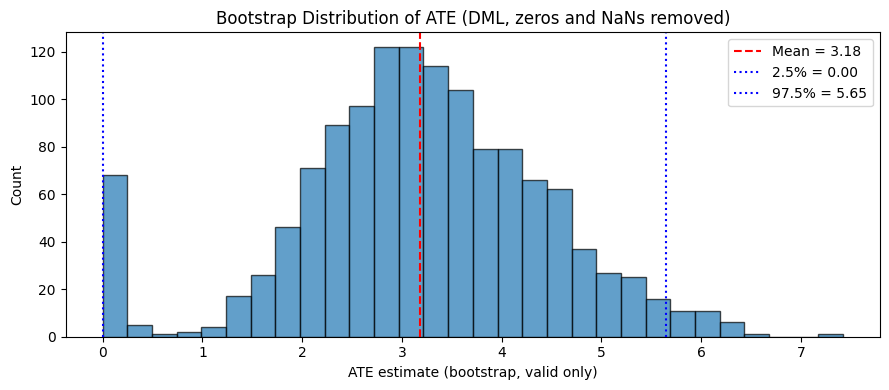

In [ ]:
bootstrap_good = df_res.loc[(df_res['estimate'] > 0) & np.isfinite(df_res['estimate']), 'estimate'].values

print(f"전체 부트스트랩 반복: {len(df_res)}")
print(f"정상 추정치 개수(0, NaN/inf 제외): {len(bootstrap_good)}")
print(f"0 또는 NaN/inf로 나온 케이스: {len(df_res) - len(bootstrap_good)}")


if len(bootstrap_good) > 0:
    point_estimate = np.mean(bootstrap_good)
    ci_lower = np.percentile(bootstrap_good, 2.5)
    ci_upper = np.percentile(bootstrap_good, 97.5)
    print(f"\n=== 효과 추정 (0, NaN/inf 제외) ===")
    print(f"Bootstrap mean estimate (ATE): {point_estimate:.3f}")
    print(f"95% CI: ({ci_lower:.3f}, {ci_upper:.3f})")
else:
    print("정상 추정치가 없습니다.")


plt.figure(figsize=(9, 4))
plt.hist(bootstrap_good, bins=30, alpha=0.7, edgecolor='k')
plt.axvline(point_estimate, color='red', linestyle='--', label=f"Mean = {point_estimate:.2f}")
plt.axvline(ci_lower, color='blue', linestyle=':', label=f"2.5% = {ci_lower:.2f}")
plt.axvline(ci_upper, color='blue', linestyle=':', label=f"97.5% = {ci_upper:.2f}")
plt.xlabel("ATE estimate (bootstrap, valid only)")
plt.ylabel("Count")
plt.title("Bootstrap Distribution of ATE (DML, zeros and NaNs removed)")
plt.legend()
plt.tight_layout()
plt.show()

0.000000000000001 이하의 추정치 개수: 62
0.000000000000001 초과 정상 추정치: 1247
Strict mean estimate: 3.340
95% CI: (1.471, 5.661)


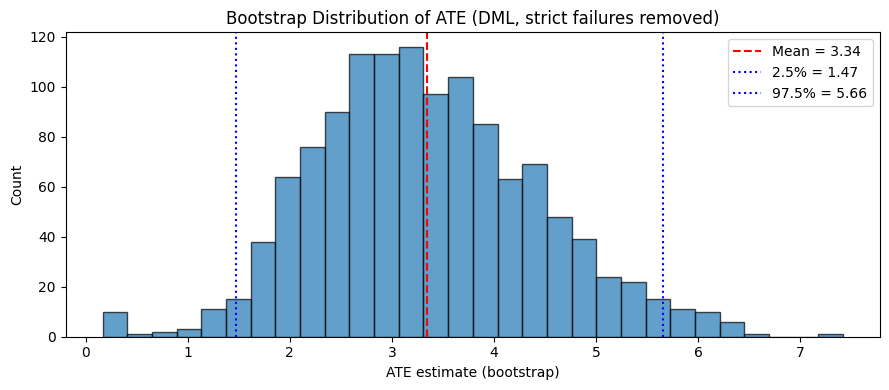

In [ ]:
count_under_01 = np.sum(bootstrap_good <= 0.000000000000001)
print(f"0.000000000000001 이하의 추정치 개수: {count_under_01}")

bootstrap_strict = bootstrap_good[bootstrap_good > 0.000000000000001]
print(f"0.000000000000001 초과 정상 추정치: {len(bootstrap_strict)}")
if len(bootstrap_strict) > 0:
    point_estimate = np.mean(bootstrap_strict)
    ci_lower = np.percentile(bootstrap_strict, 2.5)
    ci_upper = np.percentile(bootstrap_strict, 97.5)
    print(f"Strict mean estimate: {point_estimate:.3f}")
    print(f"95% CI: ({ci_lower:.3f}, {ci_upper:.3f})")
else:
    print("Strict 기준으로는 추정치가 남지 않음")
    
    

plt.figure(figsize=(9, 4))
plt.hist(bootstrap_strict, bins=30, alpha=0.7, edgecolor='k')
plt.axvline(point_estimate, color='red', linestyle='--', label=f"Mean = {point_estimate:.2f}")
plt.axvline(ci_lower, color='blue', linestyle=':', label=f"2.5% = {ci_lower:.2f}")
plt.axvline(ci_upper, color='blue', linestyle=':', label=f"97.5% = {ci_upper:.2f}")
plt.xlabel("ATE estimate (bootstrap)")
plt.ylabel("Count")
plt.title("Bootstrap Distribution of ATE (DML, strict failures removed)")
plt.legend()
plt.tight_layout()
plt.show()